In [1]:
import numpy as np
from scipy.optimize import fmin
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
a = 11.0
b = -0.4
c = 1.0
d = 0.21

In [3]:
def f1(X):
    return a*X[0] + b*X[1] + np.exp(c*X[0]**2+d*X[1]**2)    

In [4]:
def gradf1(X):
    return np.array([a+2*c*X[0]*np.exp(c*X[0]**2+d*X[1]**2),
                     b+2*d*X[1]*np.exp(c*X[0]**2+d*X[1]**2)])

In [15]:
def step_gradient(f, gradf, X0, p0=1, eps=0.1, delta=0.9, eps0 = 10**(-6) ):
    p = p0
    i = 1
    x_iters = X0
    while np.linalg.norm(gradf(X0))>eps0:
        X1 = X0 - p*gradf(X0)
        if f(X1)>(f(X0)-eps*p*np.linalg.norm(gradf(X0))**2):
            p = p*delta
            continue
        X0 = X1
        i+=1
        x_iters = np.vstack((x_iters,X0))
    return X0, f(X0), i, x_iters

In [6]:
m1 = fmin(f1, np.array([0,0]))

Optimization terminated successfully.
         Current function value: -9.032898
         Iterations: 78
         Function evaluations: 150


In [16]:
x_min, f_min, i, x_iters  = step_gradient(f1, gradf1, np.array([0,0]))

In [17]:
print('Минимум функци: {0}\nЗначение функции в миниумуме: {1}\nКоличество итераций: {2}'.format(x_min, f_min, i))

Минимум функци: [-1.2224797   0.21168429]
Значение функции в миниумуме: -9.032898150066826
Количество итераций: 291


##### Порядок сходимости

In [18]:
dx = np.linalg.norm((x_iters-x_min),axis=1)

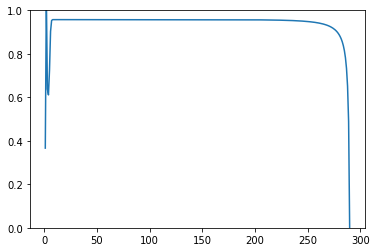

In [19]:
x = np.arange(1,i)
plt.ylim(0,1)
plt.plot(x, (dx[1:]/dx[:-1]))

Порядок сходимости вначале линейный с коээфициентом чуть меньше 1,  потом резко возрастает

In [20]:
A = np.array([[2,2],\
              [2,3]])

In [21]:
def f2(X):
    return 2*X[0]**2 + 3*X[1]**2 + 4*X[0]*X[1]

In [22]:
def gradf2(X):
    return np.array([4*X[0]+4*X[1], 4*X[0]+6*X[1]])

In [23]:
def best_step(A, gradf, X):
    return ((gradf(X).dot(gradf(X)))/((A@gradf(X)).dot(gradf(X))))/2

In [24]:
def grad_quick_descent(f, gradf, X0, eps = 10**(-18)):
    x_iters = X0
    i = 1
    while np.linalg.norm(gradf(X0))>eps:
        p = best_step(A,gradf,X0)
        X0 = X0-p*gradf(X0)
        x_iters = np.vstack((x_iters, X0))
        i+=1
    return X0, f(X0), i, x_iters

In [25]:
x_min, f_min, i, x_iters = grad_quick_descent(f2, gradf2, np.array([1,1]))

In [26]:
print('Минимум функци: {0}\nЗначение функции в миниумуме: {1}\nКоличество итераций: {2}'.format(x_min, f_min, i))

Минимум функци: [ 3.46386939e-19 -2.71085430e-19]
Значение функции в миниумуме: 8.482794485319693e-38
Количество итераций: 14


In [27]:
dx = np.linalg.norm((x_iters-x_min),axis=1)

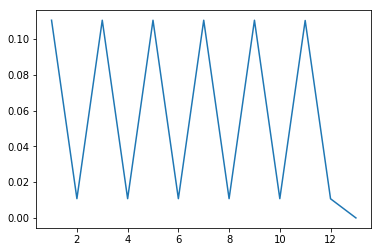

In [28]:
x = np.arange(1,i)
plt.plot(x, (dx[1:]/dx[:-1]))

**Порядок сходимости** - примерно линейный с коээфициентом 0.02 - 0.1

**Вывод**: метод наискорейшего спуска сходится быстрее, но он намного сложней в реализации, потому как на каждом шаге нужно искать миниум функции по шагу **p**